<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/miscellaneous/09_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXERCISE 9**

Fulfill the following tasks in this exercise:

1. Create neural network model in many stages, *i.e.* from basic to improved model.
2. Try to visualize things as many as you can.
3. Evaluate performance metrics such as MAE and MSE.
4. Compare all models you built and gain insight which model performs best.


> Try to make helper/utility functions, which you think you may need them again in near future.

In [1]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


In [2]:
# Importing other dependencies
import numpy as np
import matplotlib.pyplot as plt

### Creating Features and Labels tensors

In [3]:
# Creating features
X = tf.range(-30,50, 3) # from -30 to +50 with a step of 3
X

<tf.Tensor: shape=(27,), dtype=int32, numpy=
array([-30, -27, -24, -21, -18, -15, -12,  -9,  -6,  -3,   0,   3,   6,
         9,  12,  15,  18,  21,  24,  27,  30,  33,  36,  39,  42,  45,
        48], dtype=int32)>

In [4]:
# Creating labels
y = X + 5
y

<tf.Tensor: shape=(27,), dtype=int32, numpy=
array([-25, -22, -19, -16, -13, -10,  -7,  -4,  -1,   2,   5,   8,  11,
        14,  17,  20,  23,  26,  29,  32,  35,  38,  41,  44,  47,  50,
        53], dtype=int32)>

In [27]:
# Coverting int tensors into float tensors
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

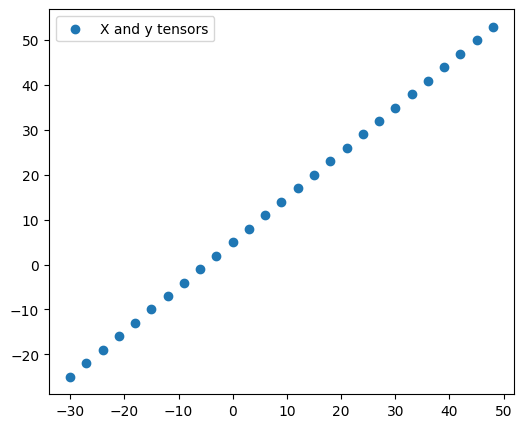

In [28]:
# Visualizing feature and labels tensors
plt.figure(figsize=(6,5))
plt.scatter(X, y, label="X and y tensors")
plt.legend()

### Splitting into training and testing sets

In [29]:
# First let's check if both features and labels are equal in length or not
len(X) == len(y)

True

In [30]:
# Checking features length so we can split
len(X)

27

In [31]:
# Splitting into training tensor sets
X_train = X[:18]  # giving 0 to 18 samples out of 27 for training
y_train = y[:18]  # ,,


# Splitting into testing tensor sets
X_test = X[18:]   # giving remaining samples after 18
y_test = y[18:]  # ,,

In [32]:
print("Length of X_train: ", len(X_train))
print("Length of X_test: ", len(X_test))

print("Length of y_train: ", len(y_train))
print("Length of y_test: ", len(y_test))

Length of X_train:  18
Length of X_test:  9
Length of y_train:  18
Length of y_test:  9


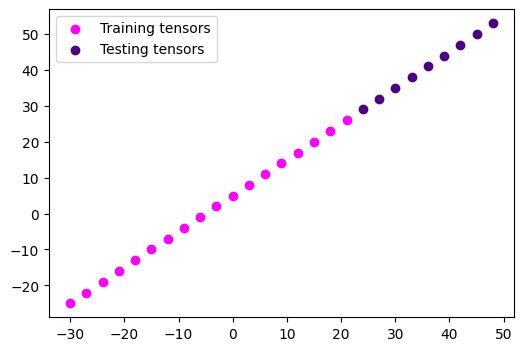

In [33]:
# Visualizing our training and testing tensor sets
plt.figure(figsize=(6,4))

# Plotting training tensor sets
plt.scatter(X_train, y_train, c="magenta", label="Training tensors")

# Plotting testing tensor sets
plt.scatter(X_test, y_test, c="indigo", label="Testing tensors")

# Plotting legend
plt.legend()

### Making basic model

In [34]:
tf.random.set_seed(42) # random seed for reproducability

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step - loss: 6.5737 - mae: 6.5737
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.9625 - mae: 5.9625
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 5.7500 - mae: 5.7500
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 5.5375 - mae: 5.5375
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 5.3250 - mae: 5.3250


In [35]:
# Making predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[24.902357],
       [28.009178],
       [31.116001],
       [34.222824],
       [37.329647],
       [40.43647 ],
       [43.543293],
       [46.650116],
       [49.75694 ]], dtype=float32)

In [36]:
# Let's see how much it is aligning with testing labels
y_test

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([29., 32., 35., 38., 41., 44., 47., 50., 53.], dtype=float32)>

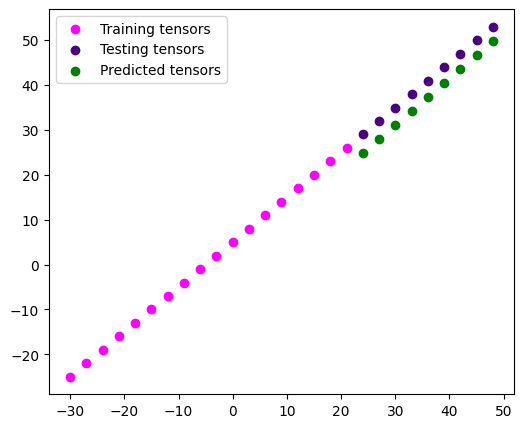

In [38]:
# Let's visualize the predictions
plt.figure(figsize=(6,5))
plt.scatter(X_train, y_train, color="magenta", label="Training tensors")

plt.scatter(X_test, y_test, color="indigo", label="Testing tensors")

plt.scatter(X_test, y_pred, color="green", label="Predicted tensors")

plt.legend()

Woah!! Looking close , why not we calculate it metrics

#### Calculating MAE and MSE metrics scores

In [43]:
mae = tf.metrics.MeanAbsoluteError()(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred)).numpy()  # squeezing y_pred to match y_test shape
mae

np.float32(3.6703525)

In [44]:
mse = tf.metrics.MeanSquaredError()(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred)).numpy()
mse

np.float32(13.547564)

Now we gonna use this methodology:
```
* Building a model
* Make predictions
* Visualize it
* Calculate metrics
```

If we're gonna such much things now, it's better idea to create some helper functions or utility functions so that we don't have to write code again and again for the same functionality.

### Creating some helper/utility functions

`Function for plotting predictions`

In [45]:
def plot_predictions(train_data = X_train,
                 test_data = X_test,
                 train_label = y_train,
                 test_label = y_test,
                 predictions = y_pred):

  plt.figure(figsize=(6,5))

  plt.scatter(train_data, train_label, color="magenta", label="Training tensors")
  plt.scatter(test_data, test_label, color="indigo", label="Testing tensors")
  plt.scatter(test_data, predictions, color="green", label="Predicted tensors")

  plt.legend()

`Function for calculating MAE and MSE`

In [48]:
def mae(y_true=y_test, y_pred=y_pred):
  tf.metrics.MeanAbsoluteError()(y_true, tf.squeeze(y_pred))

def mse(y_true=y_test, y_pred=y_pred):
  tf.metrics.MeanSquaredError()(y_true, tf.squeeze(y_pred))